In [1]:
from env.SoccerActionsEnv import SoccerActionsEnv

import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm

import optuna

In [2]:
def calculate_horizontal_position(x, y):
    if x < 0.75:
        if y < 0.25:
            return 0
        elif y < 0.5:
            return 1
        elif y < 0.75:
            return 2
        else:
            return 3
    else:
        if y < 0.2037:
            return 0
        elif y < 0.3653:
            return 1
        elif y < 0.50:
            return 2
        elif y < 0.6347:
            return 3
        elif y < 0.7963:
            return 4
        else:
            return 5

def calculate_square(x, y):
    if x < 0.1666:
        return 0 + calculate_horizontal_position(x, y)
    elif x < 0.3333:
        return 4 + calculate_horizontal_position(x, y)
    elif x < 0.5:
        return 8 + calculate_horizontal_position(x, y)
    elif x < 0.6666:
        return 12 + calculate_horizontal_position(x, y)
    elif x < 0.75:
        return 16 + calculate_horizontal_position(x, y)
    elif x < 0.8428:
        return 20 + calculate_horizontal_position(x, y)
    elif x < 0.9476:
        return 26 + calculate_horizontal_position(x, y)
    else:
        return 32 + calculate_horizontal_position(x, y)

def test_model(action, r, a):
    env = SoccerActionsEnv(randomized_start=True, end_on_xg=True)
    obs = env.reset()

    saving_rewards = []
    for i in tqdm(range(20000)):
        pos = calculate_square(obs[0], obs[1])
        obs, rewards, done, info = env.step([action[pos], r[pos], a[pos]])
        if done:
            saving_rewards.append(rewards)
            env.reset()

    return np.mean(saving_rewards)

In [6]:
xxs = [8.33, 8.33, 8.33, 8.33, 25, 25, 25, 25, 41.66, 41.66, 41.66, 41.66, 58.33, 58.33, 58.33, 58.33, 70.83, 70.83, 70.83, 70.83, 79.64, 79.64, 79.64, 79.64, 79.64, 79.64, 89.52, 89.52, 89.52, 89.52, 89.52, 89.52, 97.38, 97.38, 97.38, 97.38, 97.38, 97.38]
yys = [12.5, 37.5, 62.5, 87.5, 12.5, 37.5, 62.5, 87.5, 12.5, 37.5, 62.5, 87.5, 12.5, 37.5, 62.5, 87.5, 12.5, 37.5, 62.5, 87.5, 10.19, 28.45, 43.27, 56.73, 71.55, 89.81, 10.19, 28.45, 43.27, 56.73, 71.55, 89.81, 10.19, 28.45, 43.27, 56.73, 71.55, 89.81]

df = pd.DataFrame(xxs, columns=['x'])
df['y'] = yys
df['i'] = [i for i in range(38)]
df['action'] = [
    1, 1, 1, 1, 
    1, 1, 1, 1, 
    1, 1, 1, 1, 
    1, 1, 1, 1, 
    1, 1, 1, 1,
    1, 1, 0, 0, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 1, 0, 0, 1, 1
]
df['r'] = [
    0.15, 0.15, 0.15, 0.15, 
    0.15, 0.15, 0.15, 0.15, 
    0.15, 0.15, 0.15, 0.15, 
    0.15, 0.15, 0.15, 0.15, 
    0.15, 0.15, 0.15, 0.15,
    0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
    0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
    0.15, 0.15, 0.15, 0.15, 0.15, 0.15
]
df['a'] = [
    0.5, 0.5, 0.5, 0.5, 
    0.5, 0.5, 0.5, 0.5, 
    0.5, 0.5, 0.5, 0.5, 
    0.5, 0.5, 0.5, 0.5, 
    0.5, 0.5, 0.5, 0.5,
    0.75, 0.5, 0.5, 0.5, 0.5, 0.5,
    0.75, 0.75, 0.5, 0.5, 0.25, 0.25,
    0.75, 0.75, 0.5, 0.5, 0.25, 0.25
]

In [9]:
test_model(df.action, df.r, df.a)

C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 20000/20000 [00:06<00:00, 2868.92it/s]


0.012080532720920299

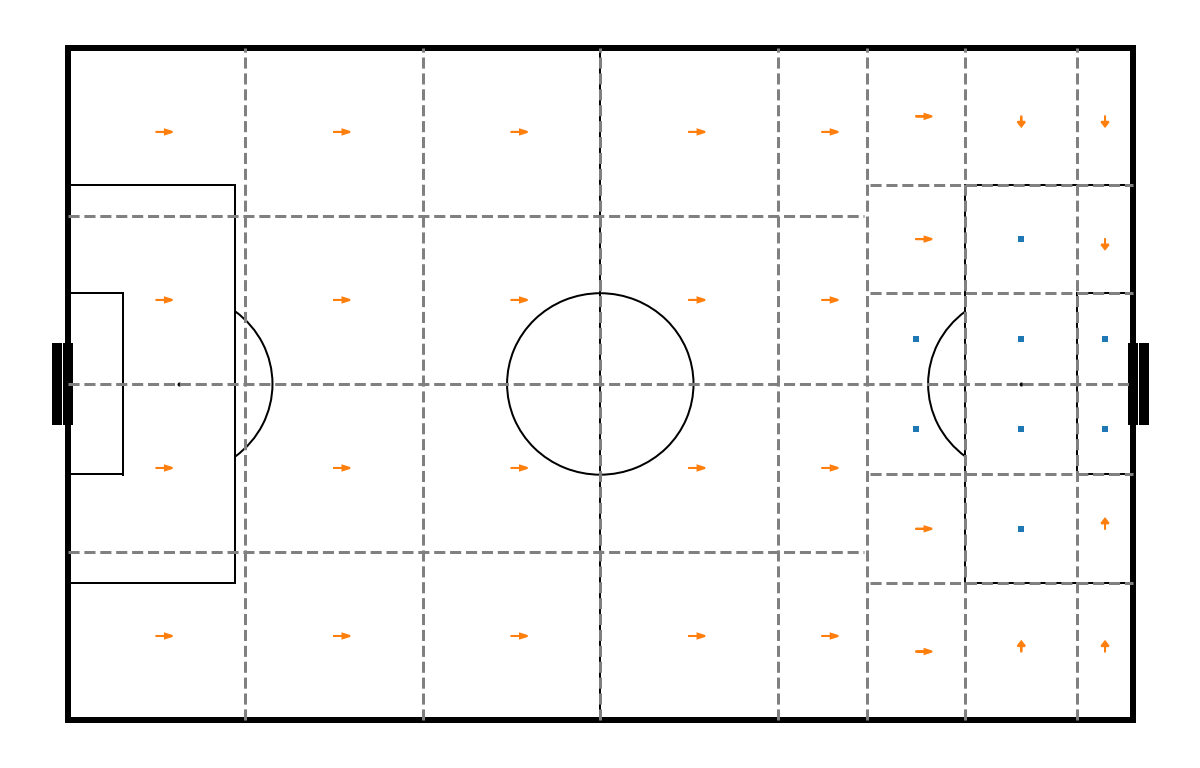

In [5]:
draw.pitch()
scouter_shots = df[df.action < 0.5]
scouter_passes = df[df.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
for i, row in scouter_passes.iterrows():
    plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')

plt.axvline(16.66, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(33.33, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(50, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(66.66, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(75, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(84.28, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')
plt.axvline(94.76, ymin=0.0455, ymax=0.9545, linestyle='--', color='grey')

plt.axhline(25, xmin=0.0455, xmax=0.725, linestyle='--', color='grey')
plt.axhline(50, xmin=0.0455, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(75, xmin=0.0455, xmax=0.725, linestyle='--', color='grey')
plt.axhline(20.37, xmin=0.73, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(36.53, xmin=0.73, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(63.47, xmin=0.73, xmax=0.9545, linestyle='--', color='grey')
plt.axhline(79.63, xmin=0.73, xmax=0.9545, linestyle='--', color='grey');